In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
df = pd.read_csv('C:/Datasets/netflix_titles.csv')

In [4]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df.groupby('type').agg({'type': 'count'}).rename(columns = {'type' : 'count'}).reset_index()

,type,count
0,Movie,4265
1,TV Show,1969


In [17]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="PLOT", height=400, legend=dict(x=0.1, y=1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [7]:

df.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [18]:

df['release_year'].min()

1925

In [19]:
df[df['release_year'] >= 1925].sort_values(by='release_year', ascending=True)[['title', 'release_year']].head(10)

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
2011,Prelude to War,1942
2013,The Battle of Midway,1942
2022,Undercover: How to Operate Behind Enemy Lines,1943
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2012,San Pietro,1945


In [20]:
df.groupby('release_year').agg({'release_year':'count'}).rename(columns={'release_year': 'movies'}).reset_index()

,release_year,movies
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,3
...,...,...
67,2016,830
68,2017,959
69,2018,1063
70,2019,843


In [21]:
years = df.groupby('release_year').agg({'release_year':'count'}).rename(columns={'release_year': 'movies'}).reset_index()['release_year'].values
movies = df.groupby('release_year').agg({'release_year':'count'}).rename(columns={'release_year': 'movies'}).reset_index()['movies'].values

<AxesSubplot:>

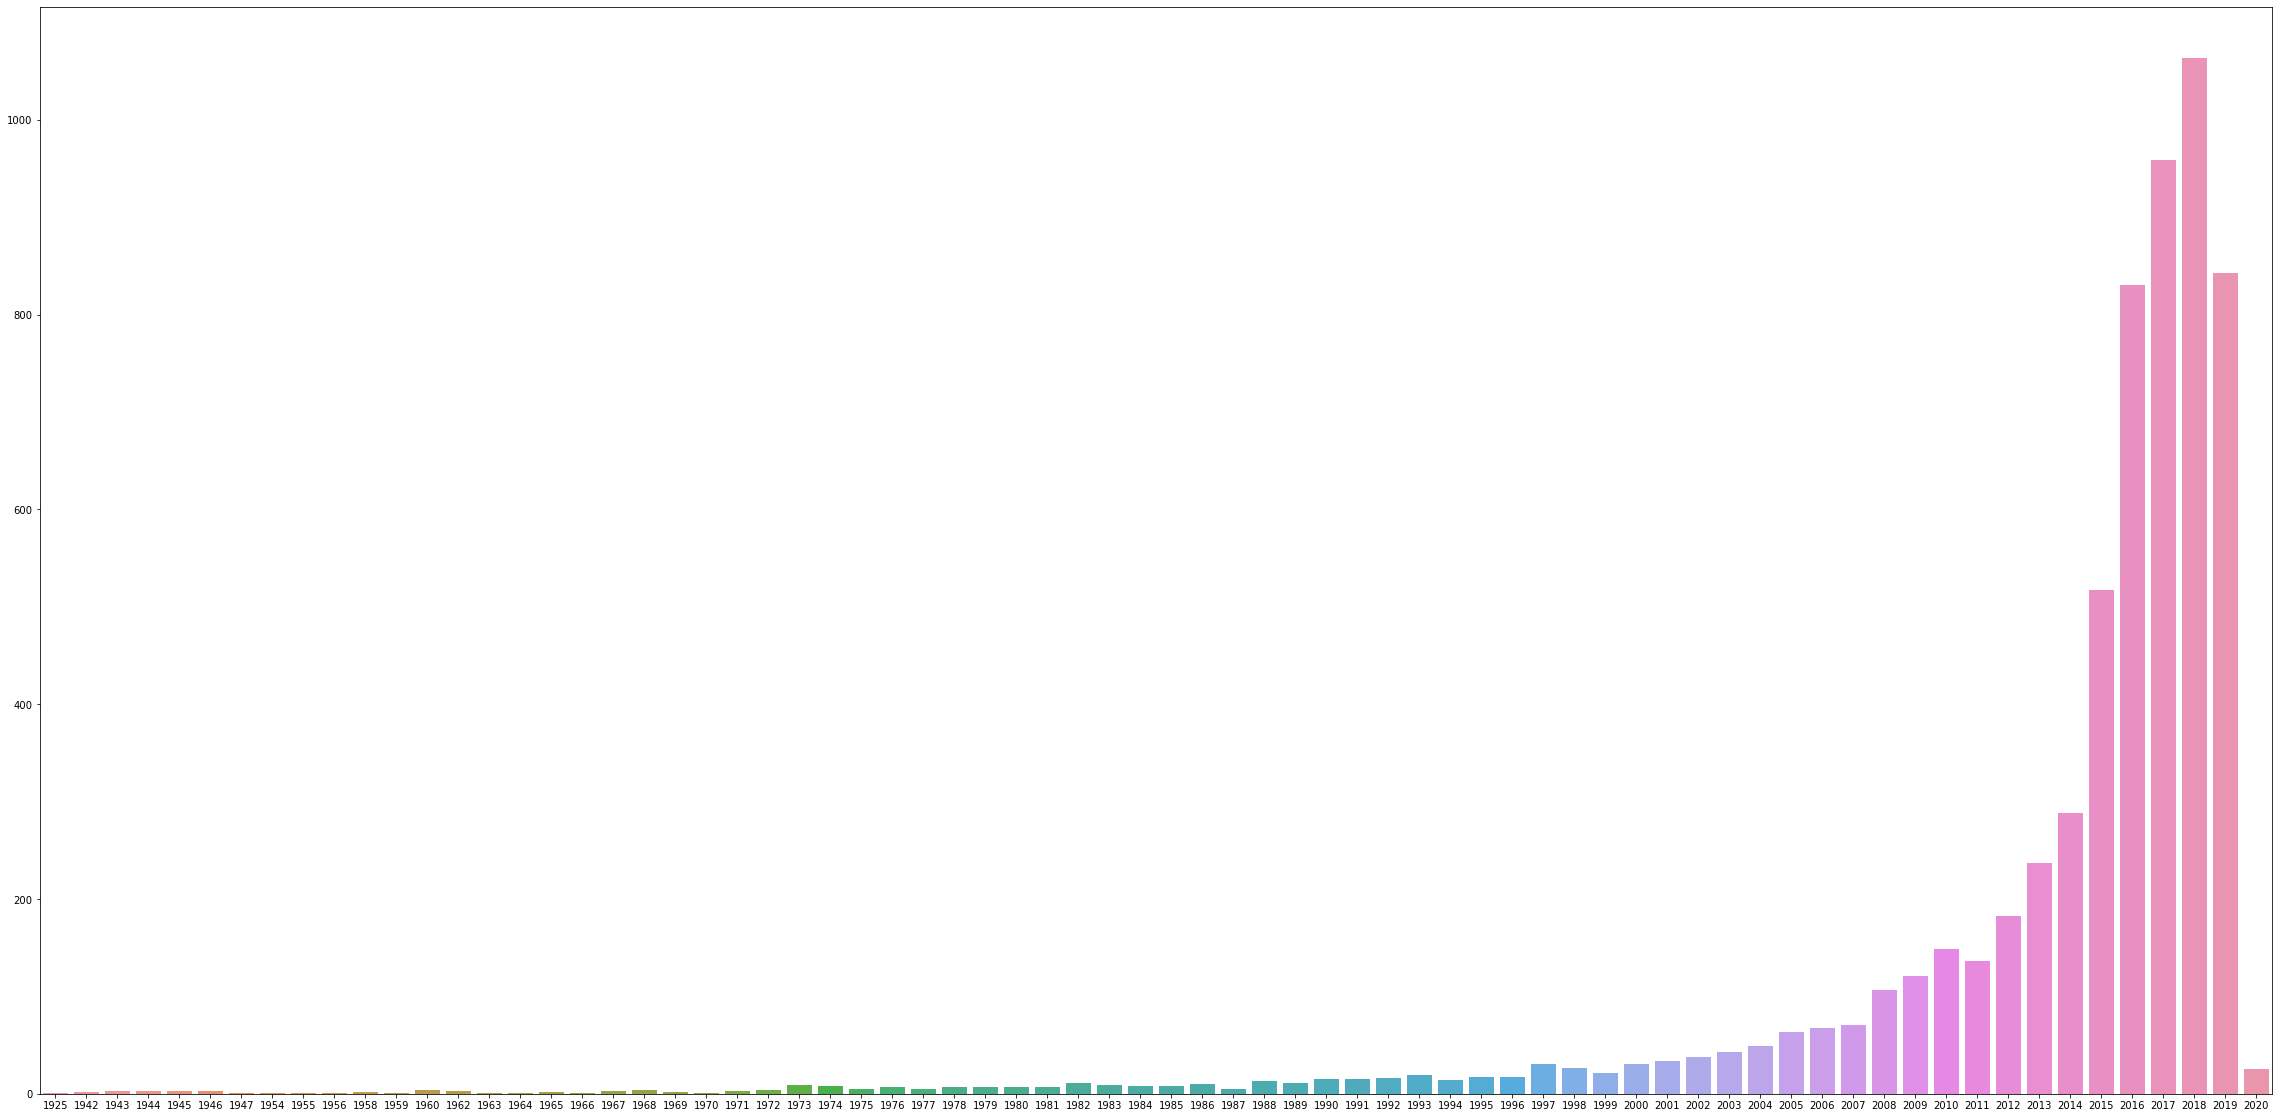

In [25]:
plt.figure(figsize=(40, 20))
plt.tight_layout()

sns.barplot(x=years, y=movies)

In [26]:
m_and_s_count = df.groupby(['type', 'release_year']).agg({'type': 'count'}).rename(columns={'type':'count'}).reset_index()

In [27]:
m_and_s_count

,type,release_year,count
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,2
...,...,...,...
110,TV Show,2016,237
111,TV Show,2017,277
112,TV Show,2018,417
113,TV Show,2019,443


In [28]:
m_and_s_count = m_and_s_count.pivot(index='release_year', columns='type').reset_index()

In [29]:
m_and_s_count

release_year  count        
type               Movie TV Show
0            1925    NaN     1.0
1            1942    2.0     NaN
2            1943    3.0     NaN
3            1944    3.0     NaN
4            1945    3.0     NaN
..            ...    ...     ...
67           2016  593.0   237.0
68           2017  682.0   277.0
69           2018  646.0   417.0
70           2019  400.0   443.0
71           2020    6.0    19.0

[72 rows x 3 columns]

In [30]:
m_and_s_count.columns = m_and_s_count.columns.map('_'.join)

In [31]:
m_and_s_count

,release_year_,count_Movie,count_TV Show
0,1925,NaN,1.0
1,1942,2.0,NaN
2,1943,3.0,NaN
3,1944,3.0,NaN
4,1945,3.0,NaN
...,...,...,...
67,2016,593.0,237.0
68,2017,682.0,277.0
69,2018,646.0,417.0
70,2019,400.0,443.0


<AxesSubplot:xlabel='release_year_', ylabel='value'>

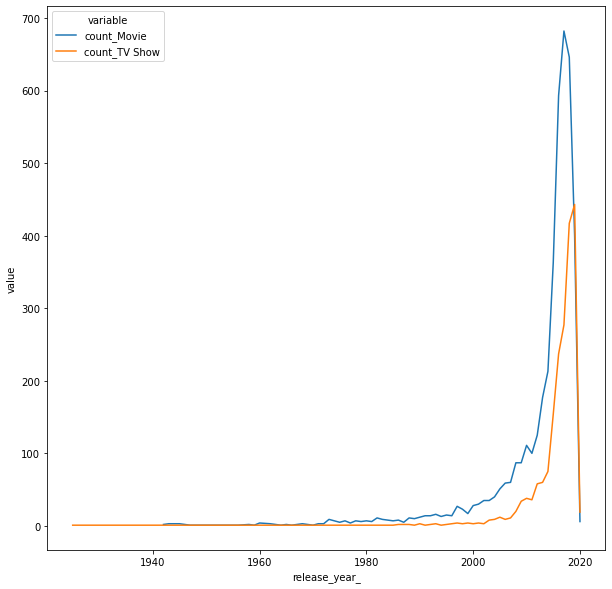

In [32]:
plt.figure(figsize = (10, 10))

sns.lineplot(x='release_year_', y='value', hue='variable',
             data=pd.melt(m_and_s_count, ['release_year_']))

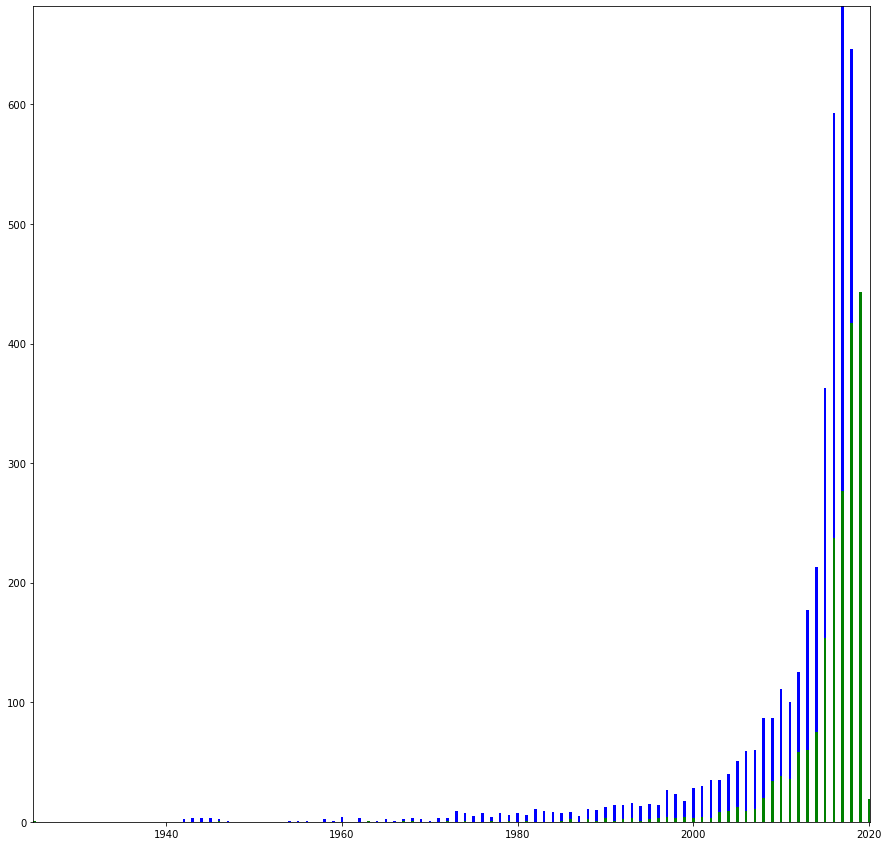

In [33]:
plt.figure(figsize = (15, 15))

ax = plt.subplot(111)
w = 0.3
ax.bar(x = m_and_s_count['release_year_'].values, height = m_and_s_count['count_Movie'].values, width=w, color='b', align='center')
ax.bar(x = m_and_s_count['release_year_'].values, height = m_and_s_count['count_TV Show'].values, width=w, color='g', align='center')
ax.autoscale(tight=True)
plt.show()

In [34]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [35]:
col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col) 

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [36]:

small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
2011,Prelude to War,1942
2013,The Battle of Midway,1942
2022,Undercover: How to Operate Behind Enemy Lines,1943
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2012,San Pietro,1945


In [42]:
col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [44]:
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

In [45]:
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [46]:
def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

In [51]:
small = df[df["type"] == "Movie"]
small = small[small["country"] == "India"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="orange"))

data = [trace1]
layout = go.Layout(title="Movie Directors from India with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [75]:
tag = "Dramas"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"] == 1]
small[small["country"] == "United States"][["title", "country","release_year"]].head(90)

,title,country,release_year
24,The Runner,United States,2015
25,6 Years,United States,2015
52,Carrie Pilby,United States,2016
54,No Tomorrow,United States,2016
57,The World We Make,United States,2019
...,...,...,...
1036,The Lovers,United States,2017
1059,A Christmas Prince: The Royal Wedding,United States,2018
1088,Holiday Rush,United States,2019
1096,Defiance,United States,2008


In [74]:
tag = "Dramas"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"]==1]
small[small["country"] == "India"][["title", "country","release_year"]].head(10)

,title,country,release_year
35,Article 15,India,2019
41,PK,India,2014
58,Watchman,India,2019
99,Bard of Blood,India,2019
130,Manmadhudu 2,India,2019
136,Do Paise Ki Dhoop Chaar Aane Ki Baarish,India,2009
177,Kabir Singh,India,2019
229,Eeda,India,2018
232,​Goli Soda 2,India,2018
236,​Maj Rati ​​Keteki,India,2017
